In [1]:
import pandas as pd

covid_cases_data=pd.read_csv("covid_confirmed_usafacts.csv")
covid_cases_df=pd.DataFrame(covid_cases_data)
covid_cases_df.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19913,19913,19913,19913,19913,19913,19913,19913,19913,19913
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,70521,70521,70521,70521,70521,70521,70521,70521,70521,70521
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,8149,8149,8149,8149,8149,8149,8149,8149,8149,8149


In [2]:
import pandas as pd

covid_deaths_data=pd.read_csv("covid_deaths_usafacts.csv")
covid_deaths_df=pd.DataFrame(covid_deaths_data)
covid_deaths_df.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,235,235,235,235,235,235,235,235,235,235
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,731,731,731,731,731,731,731,731,731,731
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,104,104,104,104,104,104,104,104,104,104
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,111,111,111,111,111,111,111,111,111,111


Linear Regression RMSE: 1596074.3607497062
Polynomial Regression RMSE (degree=3): 305498.322237138


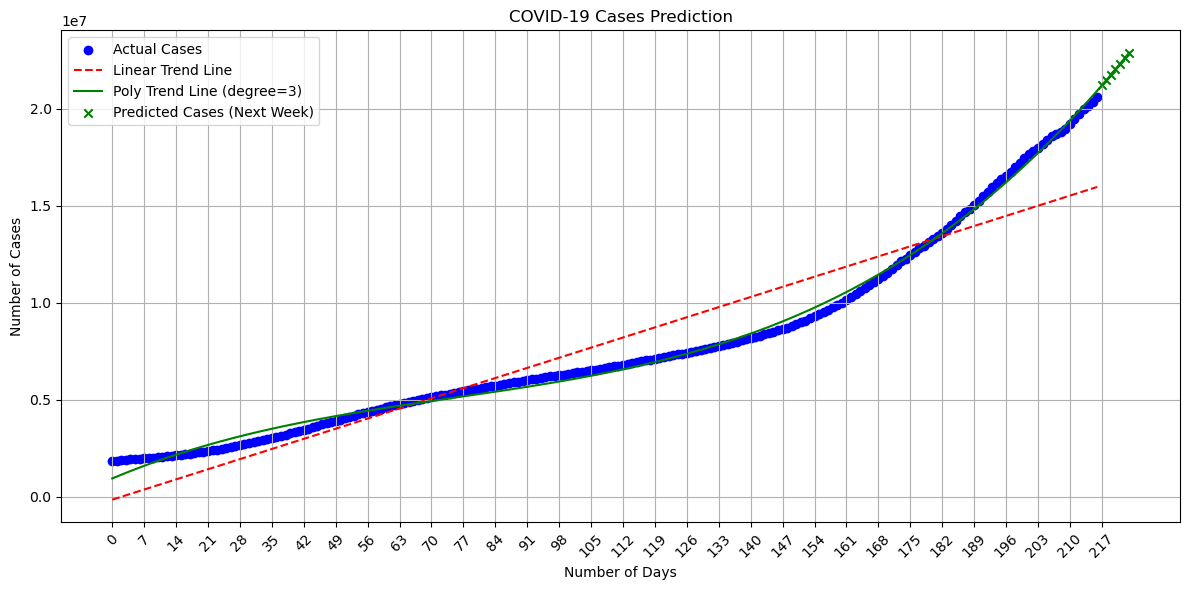

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read the COVID-19 cases data
covid_cases_data = pd.read_csv("covid_confirmed_usafacts.csv")

# Filter data for the specified date range
start_date = "2020-06-01"
end_date = "2021-01-03"
date_range = pd.date_range(start_date, end_date).strftime('%Y-%m-%d').tolist()
covid_cases_data = covid_cases_data[['countyFIPS', 'County Name', 'State'] + date_range]

# Prepare data for analysis
cases_data = covid_cases_data[date_range].sum(axis=0).values
days_since_start = np.arange(len(date_range)).reshape(-1, 1)

# Fit linear regression model
reg_linear = LinearRegression().fit(days_since_start, cases_data.reshape(-1, 1))

# Calculate RMSE for linear regression
linear_predictions = reg_linear.predict(days_since_start)
linear_rmse = np.sqrt(mean_squared_error(cases_data, linear_predictions))

# Fit polynomial regression model
degree = 3  # Change this if you want
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(days_since_start)
reg_poly = LinearRegression().fit(X_poly, cases_data.reshape(-1, 1))

# Calculate RMSE for polynomial regression
poly_predictions = reg_poly.predict(X_poly)
poly_rmse = np.sqrt(mean_squared_error(cases_data, poly_predictions))

# Print RMSE values
print(f"Linear Regression RMSE: {linear_rmse}")
print(f"Polynomial Regression RMSE (degree={degree}): {poly_rmse}")

# Plotting
plt.figure(figsize=(12, 6))

# Plot actual data
plt.scatter(days_since_start, cases_data, color='blue', label='Actual Cases')

# Plot linear regression trend line
plt.plot(days_since_start, reg_linear.predict(days_since_start), color='red', linestyle='--', label='Linear Trend Line')

# Plot polynomial regression trend line
X_plot_poly = poly_features.transform(np.arange(len(date_range) + 7).reshape(-1, 1))
plt.plot(np.arange(len(date_range) + 7), reg_poly.predict(X_plot_poly), color='green', label=f'Poly Trend Line (degree={degree})')

# Predictions for the next week
days_future = np.arange(len(date_range), len(date_range) + 7).reshape(-1, 1)
X_future_poly = poly_features.transform(days_future)
cases_pred = reg_poly.predict(X_future_poly)

# Plotting predictions
plt.scatter(days_future, cases_pred, color='green', marker='x', label='Predicted Cases (Next Week)')

plt.xlabel('Number of Days')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases Prediction')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, len(date_range) + 7, 7), rotation=45)
plt.tight_layout()
plt.show()

TODO: Discuss bias versus variance tradeoff.
      Describe the trends as compared to other countries.

Linear Regression RMSE: 13545.924691430659
Polynomial Regression RMSE (degree=3): 4762.935748761432


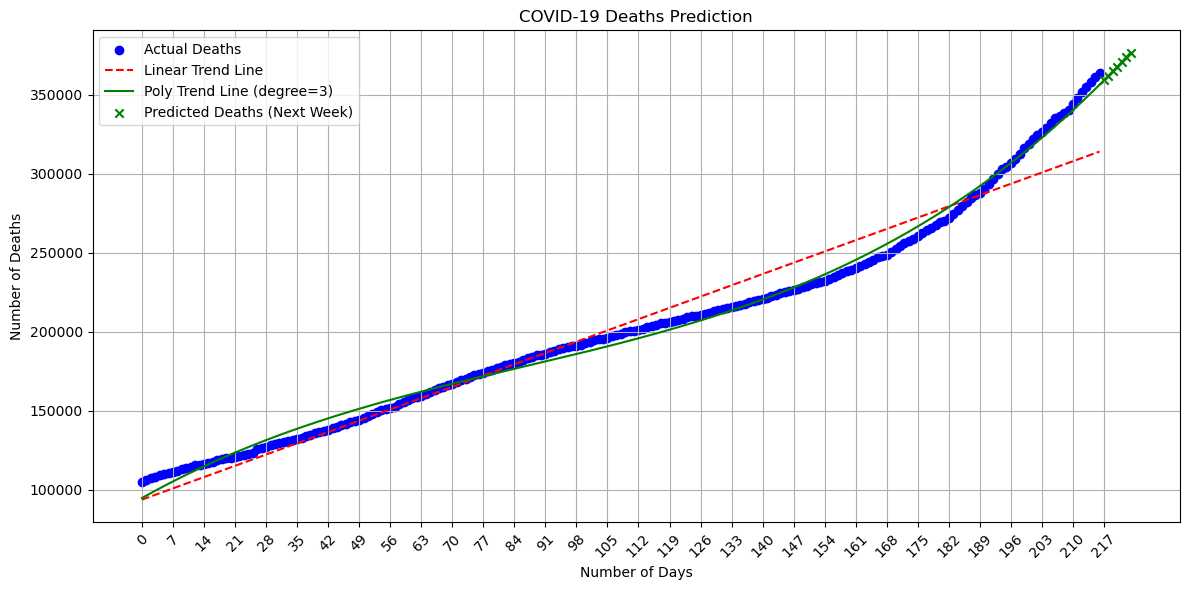

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read the COVID-19 deaths data
covid_deaths_data = pd.read_csv("covid_deaths_usafacts.csv")

# Filter data for the specified date range
start_date = "2020-06-01"
end_date = "2021-01-03"
date_range = pd.date_range(start_date, end_date).strftime('%Y-%m-%d').tolist()
covid_deaths_data = covid_deaths_data[['countyFIPS', 'County Name', 'State'] + date_range]

# Prepare data for analysis
deaths_data = covid_deaths_data[date_range].sum(axis=0).values
days_since_start = np.arange(len(date_range)).reshape(-1, 1)

# Fit linear regression model
reg_linear = LinearRegression().fit(days_since_start, deaths_data.reshape(-1, 1))

# Calculate RMSE for linear regression
linear_predictions = reg_linear.predict(days_since_start)
linear_rmse = np.sqrt(mean_squared_error(deaths_data, linear_predictions))

# Fit polynomial regression model
degree = 3  # Change this if you want
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(days_since_start)
reg_poly = LinearRegression().fit(X_poly, deaths_data.reshape(-1, 1))

# Calculate RMSE for polynomial regression
poly_predictions = reg_poly.predict(X_poly)
poly_rmse = np.sqrt(mean_squared_error(deaths_data, poly_predictions))

# Print RMSE values
print(f"Linear Regression RMSE: {linear_rmse}")
print(f"Polynomial Regression RMSE (degree={degree}): {poly_rmse}")

# Plotting
plt.figure(figsize=(12, 6))

# Plot actual data
plt.scatter(days_since_start, deaths_data, color='blue', label='Actual Deaths')

# Plot linear regression trend line
plt.plot(days_since_start, reg_linear.predict(days_since_start), color='red', linestyle='--', label='Linear Trend Line')

# Plot polynomial regression trend line
X_plot_poly = poly_features.transform(np.arange(len(date_range) + 7).reshape(-1, 1))
plt.plot(np.arange(len(date_range) + 7), reg_poly.predict(X_plot_poly), color='green', label=f'Poly Trend Line (degree={degree})')

# Predictions for the next week
days_future = np.arange(len(date_range), len(date_range) + 7).reshape(-1, 1)
X_future_poly = poly_features.transform(days_future)
deaths_pred = reg_poly.predict(X_future_poly)

# Plotting predictions
plt.scatter(days_future, deaths_pred, color='green', marker='x', label='Predicted Deaths (Next Week)')

plt.xlabel('Number of Days')
plt.ylabel('Number of Deaths')
plt.title('COVID-19 Deaths Prediction')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, len(date_range) + 7, 7), rotation=45)
plt.tight_layout()
plt.show()

TODO: Discuss bias versus variance tradeoff.
      Describe the trends as compared to other countries.